In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('players_all.csv')
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [3]:
df

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,"190cm / 6'3""",88kg / 194lbs,Right,81,CB,5,€24.5M,€37K,€48.4M,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,"194cm / 6'4""",89kg / 196lbs,Right,73,GK,10,€5.5M,€6K,€9.4M,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,"182cm / 6'0""",77kg / 170lbs,Right,80,CDM,6,€26M,€11K,€57.2M,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,"189cm / 6'2""",76kg / 168lbs,Right,72,CDM,14,€3.5M,€3K,€7.4M,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,"182cm / 6'0""",82kg / 181lbs,Right,61,GK,-1,€0,€0,€0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,G. Togni LM LWB LW,24,70,71,"Defensa y Justicia\nDec 31, 2023 On loan",237512,"180cm / 5'11""",76kg / 168lbs,Left,70,LM,1,€2M,€7K,€0,319,69,65,63,67,55,312,71,59,55,57,70,373,78,77,76,70,72,336,73,59,69,71,64,329,68,61,69,67,64,70,189,59,67,63,49,8,8,11,13,9,1907,411,1,77,66,65,71,63
3116,M. Camara CM CDM,25,75,77,Roma\n2018 ~ 2024,237520,"182cm / 6'0""",80kg / 176lbs,Right,78,CDM,2,€7M,€47K,€12.4M,348,69,71,67,75,66,347,72,69,55,75,76,378,74,77,78,74,75,391,84,70,80,82,75,366,84,76,76,76,54,77,219,73,76,70,49,11,11,9,11,7,2098,452,1,76,74,73,74,74
3117,Jorge Cuenca CB,22,73,79,Villarreal\n2020 ~ 2025,237522,"190cm / 6'3""",75kg / 165lbs,Left,75,CB,6,€4.4M,€19K,€10.1M,250,45,27,76,71,31,224,34,29,26,67,68,322,58,61,62,74,67,302,59,75,62,65,41,270,73,74,21,58,44,61,221,71,76,74,53,10,12,5,14,12,1642,347,1,60,37,58,52,74
3118,S. Kaba ST,27,69,69,"Cardiff City\nJun 30, 2023 On loan",237524,"191cm / 6'3""",80kg / 176lbs,Right,69,ST,0,€1.5M,€14K,€0,311,49,68,69,66,59,280,67,45,39,56,73,308,62,63,55,65,63,369,76,75,70,90,58,299,67,25,69,69,69,65,81,31,26,24,56,11,9,14,8,14,1704,367,1,63,67,59,67,31


In [4]:
df['Weight'] = df['Weight'].str.split(' ').str[0]
pattern = re.compile(r'\D+')
df['Weight'] = [int(pattern.sub('', weight)) for weight in df['Weight']]


In [5]:
df['Height'] = df['Height'].str.split(' ').str[0]
df['Height'] = [int(pattern.sub('', height)) for height in df['Height']]

In [6]:
df['new_values'] = df["Value"].str[1:]
# Her bir değerin sayısal değerini hesaplama
new_values = []
for value in df['new_values']:
    if 'M' in value:
        new_values.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_values.append(float(value.replace('K', '')) * 1000)
    else:
        new_values.append(float(value))

# Sonuçları yazdırma
df['new_values_series'] = new_values
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,new_values_series
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,CB,5,€24.5M,€37K,€48.4M,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,24.5M,24500000.0
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,GK,10,€5.5M,€6K,€9.4M,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,5.5M,5500000.0
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,CDM,6,€26M,€11K,€57.2M,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,26M,26000000.0
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,CDM,14,€3.5M,€3K,€7.4M,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,3.5M,3500000.0
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,182,82,Right,61,GK,-1,€0,€0,€0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,0,0.0


In [7]:
for index, row in df.iterrows():
    team_contract = row["Team & Contract"]
    team = team_contract.split("\n")[0]
    df.at[index, "Team"] = team
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,new_values_series,Team
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,CB,5,€24.5M,€37K,€48.4M,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,24.5M,24500000.0,Nice
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,GK,10,€5.5M,€6K,€9.4M,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,5.5M,5500000.0,Anderlecht
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,CDM,6,€26M,€11K,€57.2M,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,26M,26000000.0,Sporting CP
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,CDM,14,€3.5M,€3K,€7.4M,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,3.5M,3500000.0,Anderlecht
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,182,82,Right,61,GK,-1,€0,€0,€0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,0,0.0,Örgryte


In [8]:
df['new_wages'] = df["Wage"].str[1:]
# Her bir değerin sayısal değerini hesaplama
new_wages = []
for value in df['new_wages']:
    if 'M' in value:
        new_wages.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_wages.append(float(value.replace('K', '')) * 1000)
    else:
        new_wages.append(float(value))

# Sonuçları yazdırma
df['new_wages_series'] = new_wages
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,new_values_series,Team,new_wages,new_wages_series
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,CB,5,€24.5M,€37K,€48.4M,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,24.5M,24500000.0,Nice,37K,37000.0
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,GK,10,€5.5M,€6K,€9.4M,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,5.5M,5500000.0,Anderlecht,6K,6000.0
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,CDM,6,€26M,€11K,€57.2M,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,26M,26000000.0,Sporting CP,11K,11000.0
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,CDM,14,€3.5M,€3K,€7.4M,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,3.5M,3500000.0,Anderlecht,3K,3000.0
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,182,82,Right,61,GK,-1,€0,€0,€0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,0,0.0,Örgryte,0,0.0


In [9]:
df['new_release_clause'] = df["Release clause"].str[1:]
# Her bir değerin sayısal değerini hesaplama
new_release_clause = []
for value in df['new_release_clause']:
    if 'M' in value:
        new_release_clause.append(float(value.replace('M', '')) * 1000000)
    elif 'K' in value:
        new_release_clause.append(float(value.replace('K', '')) * 1000)
    else:
        new_release_clause.append(float(value))

# Sonuçları yazdırma
df['new_release_clause_series'] = new_release_clause
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values,new_values_series,Team,new_wages,new_wages_series,new_release_clause,new_release_clause_series
0,J. Todibo CB,22,79,84,Nice\n2021 ~ 2027,245388,190,88,Right,81,CB,5,€24.5M,€37K,€48.4M,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,24.5M,24500000.0,Nice,37K,37000.0,48.4M,48400000.0
1,B. Verbruggen GK,19,73,83,Anderlecht\n2020 ~ 2025,258498,194,89,Right,73,GK,10,€5.5M,€6K,€9.4M,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,5.5M,5500000.0,Anderlecht,6K,6000.0,9.4M,9400000.0
2,M. Ugarte CDM CM,21,79,85,Sporting CP\n2021 ~ 2026,253306,182,77,Right,80,CDM,6,€26M,€11K,€57.2M,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,26M,26000000.0,Sporting CP,11K,11000.0,57.2M,57200000.0
3,Z. Debast CB,18,70,84,Anderlecht\n2019 ~ 2025,254262,189,76,Right,72,CDM,14,€3.5M,€3K,€7.4M,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,3.5M,3500000.0,Anderlecht,3K,3000.0,7.4M,7400000.0
4,07 D. Last GK,37,61,60,Örgryte\n2009,21555,182,82,Right,61,GK,-1,€0,€0,€0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,0,0.0,Örgryte,0,0.0,0,0.0


In [10]:
columns_to_drop = ["Team & Contract", "Value", "Wage", "Release clause", "new_values", "new_wages", "new_release_clause"]

# Sütunları droplayın
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values_series,Team,new_wages_series,new_release_clause_series
0,J. Todibo CB,22,79,84,245388,190,88,Right,81,CB,5,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,24500000.0,Nice,37000.0,48400000.0
1,B. Verbruggen GK,19,73,83,258498,194,89,Right,73,GK,10,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,5500000.0,Anderlecht,6000.0,9400000.0
2,M. Ugarte CDM CM,21,79,85,253306,182,77,Right,80,CDM,6,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,26000000.0,Sporting CP,11000.0,57200000.0
3,Z. Debast CB,18,70,84,254262,189,76,Right,72,CDM,14,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,3500000.0,Anderlecht,3000.0,7400000.0
4,07 D. Last GK,37,61,60,21555,182,82,Right,61,GK,-1,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,0.0,Örgryte,0.0,0.0


In [11]:
df.eq(0).sum()

name                           0
Age                            0
Overall rating                 0
Potential                      0
ID                             0
Height                         0
Weight                         0
foot                           0
Best overall                   0
Best position                  0
Growth                       644
Total attacking                0
Crossing                       0
Finishing                      0
Heading accuracy               0
Short passing                  0
Volleys                        8
Total skill                    0
Dribbling                      0
Curve                          8
FK Accuracy                    0
Long passing                   0
Ball control                   0
Total movement                 0
Acceleration                   0
Sprint speed                   0
Agility                        8
Reactions                      0
Balance                        8
Total power                    0
Shot power

In [12]:
df['Growth']

0        5
1       10
2        6
3       14
4       -1
        ..
3115     1
3116     2
3117     6
3118     0
3119     7
Name: Growth, Length: 3120, dtype: int64

In [13]:
df.describe()

,Age,Overall rating,Potential,ID,Height,Weight,Best overall,Growth,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values_series,new_wages_series,new_release_clause_series
count,3120.000000,3120.000000,3120.00000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3.120000e+03,3120.000000,3.120000e+03
mean,23.446474,72.057372,78.57500,237356.609615,181.523077,74.886538,73.301603,6.517628,286.443269,57.263141,54.666667,57.004487,67.293269,50.215705,300.267949,65.822436,56.443910,48.945513,61.203205,67.852885,348.609615,71.020192,71.066667,69.529167,68.758333,68.235256,320.679167,64.824359,66.209295,67.885577,66.926603,54.833333,287.188462,61.032372,50.856090,59.173718,62.567949,53.558333,66.064423,152.963782,50.906731,52.553846,49.503205,71.257372,14.345833,14.139103,14.235256,14.235577,14.454487,1767.409615,389.414423,1.338462,73.198397,60.066667,64.576603,70.381410,53.598718,1.069590e+07,27562.900641,1.896409e+07
std,4.410452,6.995825,5.57592,30596.456327,6.888763,7.300051,6.810756,5.615699,70.223602,17.360787,19.904383,16.694585,12.549647,18.540441,73.498356,17.085640,18.261997,17.639262,13.525310,14.848767,52.405589,13.495106,13.384804,14.268184,9.061115,14.455949,48.585783,12.760674,12.718754,14.413356,12.618838,19.252256,61.684215,16.290208,21.914421,19.349040,13.327762,15.778661,12.633260,64.113895,20.978499,22.038636,22.026653,77.238787,15.966981,15.392437,15.176289,15.727764,16.361141,254.736694,39.458434,0.713221,10.039457,14.290646,9.715275,8.973548,17.955072,1.667462e+07,38599.173942,3.254522e+07
min,16.000000,48.000000,56.00000,41.000000,156.000000,52.000000,49.000000,-7.000000,48.000000,7.000000,3.000000,5.000000,14.000000,0.000000,59.000000,5.000000,0.000000,5.000000,15.000000,8.000000,105.000000,15.000000,14.000000,0.000000,34.000000,0.000000,134.000000,17.000000,0.000000,16.000000,24.000000,4.000000,51.000000,12.000000,0.000000,0.000000,0.000000,8.000000,0.000000,23.000000,5.000000,7.000000,0.000000,12.000000,1.000000,2.000000,2.000000,2.000000,2.000000,815.000000,263.000000,1.000000,30.000000,21.000000,30.000000,33.000000,15.000000,0.000000e+00,0.000000,0.000000e+00
25%,20.000000,67.000000,75.00000,227803.500000,176.000000,70.000000,68.000000,1.000000,259.000000,49.000000,41.000000,48.000000,63.000000,37.000000,271.000000,62.000000,46.000000,37.000000,54.000000,64.000000,325.000000,65.000000,65.000000,63.000000,63.000000,61.000000,291.000000,56.000000,58.000000,62.000000,59.000000,43.000000,260.000000,51.000000,30.000000,52.000000,55.000000,44.000000,60.000000,95.000000,32.750000,33.000000,29.000000,47.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1641.000000,363.000000,1.000000,67.000000,51.000000,58.000000,65.000000,37.000000,1.700000e+06,4000.000000,1.775000e+06
50%,23.000000,72.000000,79.00000,242356.000000,182.000000,75.000000,74.000000,6.000000,297.000

In [14]:
df.nlargest(5,columns="new_values_series")

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values_series,Team,new_wages_series,new_release_clause_series
121,K. Mbappé ST LW,23,91,95,231747,182,75,Right,92,ST,4,411,78,93,72,85,83,404,93,80,69,71,91,461,97,97,93,93,81,410,88,77,87,76,82,361,64,38,92,83,84,88,92,26,34,32,42,13,5,7,11,6,2181,470,4,97,89,80,92,36,190500000.0,Paris Saint Germain,230000.0,366700000.0
30,E. Haaland ST,21,90,94,239085,195,94,Left,92,ST,4,386,47,95,80,75,89,352,78,77,62,53,82,419,82,94,76,93,74,430,94,78,79,93,86,382,87,42,95,74,84,87,123,41,53,29,52,7,14,13,11,7,2144,462,4,89,92,65,80,48,176500000.0,Manchester City,240000.0,339800000.0
92,E. Haaland ST,21,90,94,239085,195,94,Left,92,ST,4,386,47,95,80,75,89,352,78,77,62,53,82,419,82,94,76,93,74,430,94,78,79,93,86,382,87,42,95,74,84,87,123,41,53,29,52,7,14,13,11,7,2144,462,4,89,92,65,80,48,176500000.0,Manchester City,240000.0,339800000.0
213,F. de Jong CM,25,87,92,228702,180,74,Right,89,CM,5,383,78,72,72,91,70,413,87,84,64,89,89,417,80,83,87,88,79,373,68,76,89,74,66,374,74,82,77,88,53,90,229,76,76,77,49,7,13,10,10,9,2238,479,3,82,69,86,87,77,116500000.0,FC Barcelona,230000.0,247600000.0
12,Vinícius Jr. LW,21,86,92,238794,176,73,Right,86,LW,6,353,72,84,50,75,72,393,92,77,62,73,89,449,95,95,94,82,83,375,76,75,84,64,76,306,58,26,82,75,65,79,75,32,25,18,36,5,7,7,7,10,1987,435,2,95,79,74,90,29,109000000.0,Real Madrid,200000.0,245300000.0


In [15]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()

In [16]:
df.nlargest(5,columns="new_values_series")

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values_series,Team,new_wages_series,new_release_clause_series
121,K. Mbappé ST LW,23,91,95,231747,182,75,Right,92,ST,4,411,78,93,72,85,83,404,93,80,69,71,91,461,97,97,93,93,81,410,88,77,87,76,82,361,64,38,92,83,84,88,92,26,34,32,42,13,5,7,11,6,2181,470,4,97,89,80,92,36,190500000.0,Paris Saint Germain,230000.0,366700000.0
30,E. Haaland ST,21,90,94,239085,195,94,Left,92,ST,4,386,47,95,80,75,89,352,78,77,62,53,82,419,82,94,76,93,74,430,94,78,79,93,86,382,87,42,95,74,84,87,123,41,53,29,52,7,14,13,11,7,2144,462,4,89,92,65,80,48,176500000.0,Manchester City,240000.0,339800000.0
213,F. de Jong CM,25,87,92,228702,180,74,Right,89,CM,5,383,78,72,72,91,70,413,87,84,64,89,89,417,80,83,87,88,79,373,68,76,89,74,66,374,74,82,77,88,53,90,229,76,76,77,49,7,13,10,10,9,2238,479,3,82,69,86,87,77,116500000.0,FC Barcelona,230000.0,247600000.0
12,Vinícius Jr. LW,21,86,92,238794,176,73,Right,86,LW,6,353,72,84,50,75,72,393,92,77,62,73,89,449,95,95,94,82,83,375,76,75,84,64,76,306,58,26,82,75,65,79,75,32,25,18,36,5,7,7,7,10,1987,435,2,95,79,74,90,29,109000000.0,Real Madrid,200000.0,245300000.0
180,K. De Bruyne CM CAM,31,91,91,192985,181,75,Right,91,CM,0,410,94,85,55,93,83,441,86,89,83,93,90,393,75,73,76,91,78,409,92,63,89,74,91,405,75,65,88,94,83,88,185,66,66,53,56,15,13,5,10,13,2299,481,4,74,88,93,86,63,107500000.0,Manchester City,350000.0,198900000.0


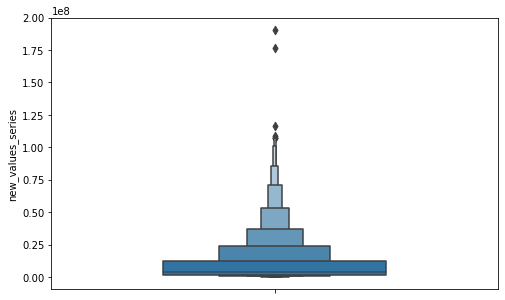

In [17]:
plt.figure(figsize=(8,5))
sns.boxenplot(y='new_values_series', data=df, width=0.5)
plt.show()

C:\Users\ulas3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


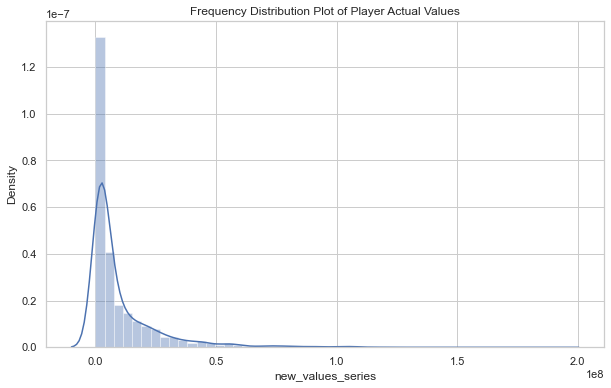

In [18]:
x = df.new_values_series
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

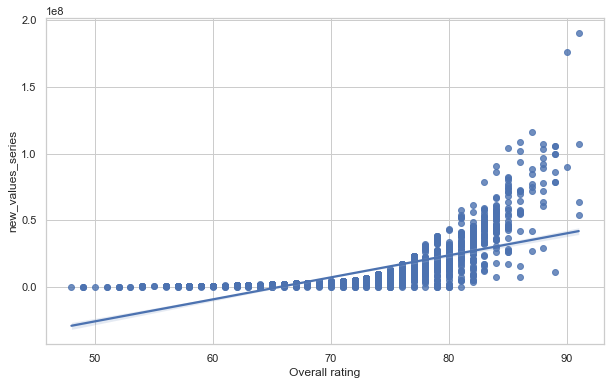

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall rating",y="new_values_series",data=df)
plt.show()

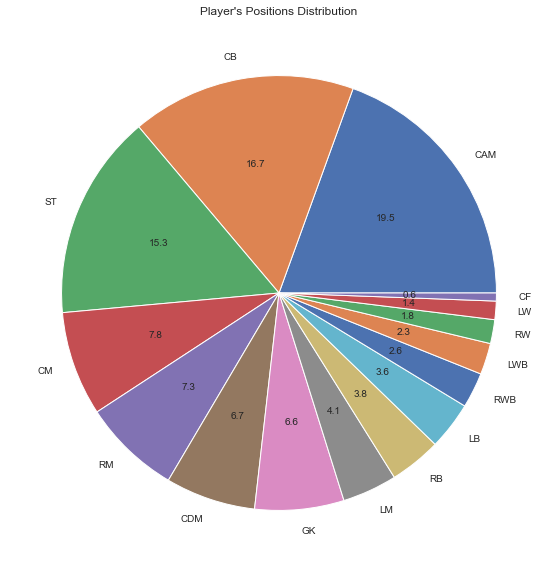

In [20]:
plt.figure(figsize=(10,10))
loc=df['Best position'].value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

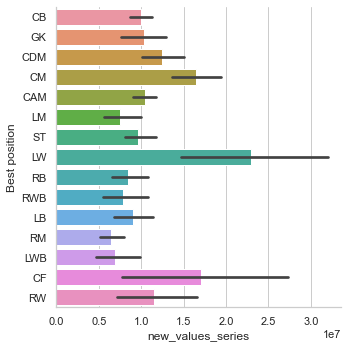

In [21]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Best position", x="new_values_series", kind="bar",  data=df)
plt.show()

# Modeling

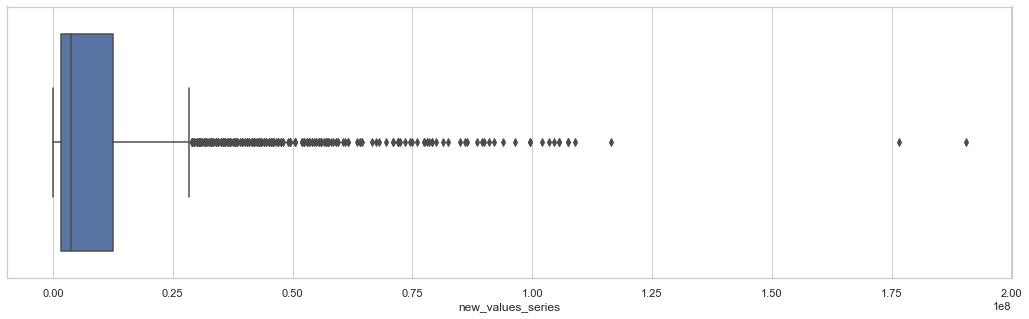

In [22]:


plt.figure(figsize=[18,5])
sns.boxplot(x=df['new_values_series'], data=df);



In [23]:
df

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,new_values_series,Team,new_wages_series,new_release_clause_series
0,J. Todibo CB,22,79,84,245388,190,88,Right,81,CB,5,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,24500000.0,Nice,37000.0,48400000.0
1,B. Verbruggen GK,19,73,83,258498,194,89,Right,73,GK,10,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,5500000.0,Anderlecht,6000.0,9400000.0
2,M. Ugarte CDM CM,21,79,85,253306,182,77,Right,80,CDM,6,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,26000000.0,Sporting CP,11000.0,57200000.0
3,Z. Debast CB,18,70,84,254262,189,76,Right,72,CDM,14,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,3500000.0,Anderlecht,3000.0,7400000.0
4,07 D. Last GK,37,61,60,21555,182,82,Right,61,GK,-1,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,0.0,Örgryte,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,D. Mihailovic CAM CM CF,23,76,81,237496,178,69,Right,78,CAM,5,346,73,71,59,79,64,361,75,73,64,72,77,370,76,69,74,76,75,349,75,54,91,62,67,331,59,62,75,80,55,75,165,67,58,40,52,14,5,6,14,13,1974,422,1,72,70,76,76,60,11500000.0,AZ,10000.0,18100000.0
3115,G. Togni LM LWB LW,24,70,71,237512,180,76,Left,70,LM,1,319,69,65,63,67,55,312,71,59,55,57,70,373,78,77,76,70,72,336,73,59,69,71,64,329,68,61,69,67,64,70,189,59,67,63,49,8,8,11,13,9,1907,411,1,77,66,65,71,63,2000000.0,Defensa y Justicia,7000.0,0.0
3116,M. Camara CM CDM,25,75,77,237520,182,80,Right,78,CDM,2,348,69,71,67,75,66,347,72,69,55,75,76,378,74,77,78,74,75,391,84,70,80,82,75,366,84,76,76,76,54,77,219,73,76,70,49,11,11,9,11,7,2098,452,1,76,74,73,74,74,7000000.0,Roma,47000.0,12400000.0
3118,S. Kaba ST,27,69,69,237524,191,80,Right,69,ST,0,311,49,68,69,66,59,280,67,45,39,56,73,308,62,63,55,65,63,369,76,75,70,90,58,299,67,25,69,69,69,65,81,31,26,24,56,11,9,14,8,14,1704,367,1,63,67,59,67,31,1500000.0,Cardiff City,14000.0,0.0


In [24]:
df = df.drop(['ID'], axis=1)

In [25]:
correlation_matrix = df.corr()

In [26]:
correlation_with_target = correlation_matrix['new_values_series']

In [27]:
correlation_with_target

Age                          0.185960
Overall rating               0.716968
Potential                    0.610678
Height                       0.044770
Weight                       0.074722
Best overall                 0.720498
Growth                      -0.293730
Total attacking              0.320909
Crossing                     0.255433
Finishing                    0.247095
Heading accuracy             0.187622
Short passing                0.402300
Volleys                      0.271671
Total skill                  0.329601
Dribbling                    0.269924
Curve                        0.283425
FK Accuracy                  0.242959
Long passing                 0.390246
Ball control                 0.328716
Total movement               0.277710
Acceleration                 0.149848
Sprint speed                 0.165183
Agility                      0.174975
Reactions                    0.660988
Balance                      0.125887
Total power                  0.377418
Shot power  

In [28]:
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Create a list of tuples with variable name and correlation value pairs
sorted_correlation_list = [(variable, correlation) for variable, correlation in sorted_correlation.items()]

# Display the sorted correlation values and names
print("Sorted correlation values and names:")
for variable, correlation in sorted_correlation_list:
    print(f"{variable}: {correlation}")

Sorted correlation values and names:
new_values_series: 1.0
new_release_clause_series: 0.96545610607782
new_wages_series: 0.7882498623480207
Best overall: 0.7204976470877357
Overall rating: 0.716967976387826
Reactions: 0.6609875266684893
Base stats: 0.6106856742425684
Potential: 0.6106777803483375
International reputation: 0.5389814984403937
Passing / Kicking: 0.5243527240477619
Dribbling / Reflexes: 0.5148252990456272
Composure: 0.4830287525910592
Total stats: 0.4461861665797496
Vision: 0.4234463486519041
Short passing: 0.40229963603999036
Long passing: 0.3902457723940329
Total power: 0.3774175929483477
Shot power: 0.3642921401361792
Shooting / Handling: 0.35514235833123664
Total mentality: 0.35204324226700945
Total skill: 0.3296007626331425
Ball control: 0.32871550176312775
Total attacking: 0.3209091213821584
Curve: 0.28342539466619887
Stamina: 0.2792852855309587
Total movement: 0.2777097469449525
Volleys: 0.27167077871121265
Dribbling: 0.2699240388261721
Long shots: 0.26592601654038